# Evaluating a classification model

In [1]:
# read the data into a Pandas DataFrame
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv', header=1, names=col_names)

In [2]:
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
# define X and y
feature_cols = ['pregnant','glucose', 'bp', 'skin', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [4]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=1)

In [5]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [6]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [7]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7575757575757576


## Confusion matrix

Table that describes the performance of a classification model

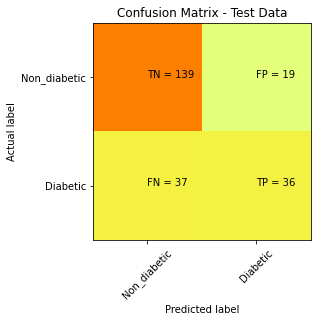

In [8]:
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, y_pred_class)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non_diabetic','Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [32]:
TP = 36
TN = 139
FP = 19
FN = 37

## Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [33]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7575757575757576
0.7142857142857143


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [34]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.24242424242424243
0.2857142857142857


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [35]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.4931506849315068
0.7534246575342466


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [36]:
print(TN / float(TN + FP))

0.879746835443038


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [37]:
print(FP / float(TN + FP))

0.12025316455696203


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [38]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.6545454545454545
0.5339805825242718


## Adjusting the classification threshold

In [16]:
# print the first 10 predicted class with default threshold of .5
logreg.predict(X_test)[0:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.33461068, 0.66538932],
       [0.92618073, 0.07381927],
       [0.53853581, 0.46146419],
       [0.93458672, 0.06541328],
       [0.84986442, 0.15013558],
       [0.53330407, 0.46669593],
       [0.9453843 , 0.0546157 ],
       [0.71080273, 0.28919727],
       [0.68697617, 0.31302383],
       [0.99140929, 0.00859071]])

In [18]:
# print the first 10 predicted probabilities for class 1  (diabetics)
logreg.predict_proba(X_test)[0:10, 1]

array([0.66538932, 0.07381927, 0.46146419, 0.06541328, 0.15013558,
       0.46669593, 0.0546157 , 0.28919727, 0.31302383, 0.00859071])

In [19]:
# store the predicted probabilities for diabetic class for all records... 
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Reduce the threshold from .5 to .3 to predict the diabetics class. This will make the model sensitive to diabetic class

In [20]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]  # deciding the class of the 1st 10 records based on new threshold

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [21]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.66538932, 0.07381927, 0.46146419, 0.06541328, 0.15013558,
       0.46669593, 0.0546157 , 0.28919727, 0.31302383, 0.00859071])

In [22]:
# print the first 10 predicted classes with the lower threshold. Note the change in class...
# with threshold of .5 (default) , the first data point would belong to 0 class i.e. non-diabetic 
y_pred_class[0:10]

array([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.])

In [23]:
# previous confusion matrix (default threshold of 0.5)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[110  48]
 [ 18  55]]


In [24]:
# sensitivity has increased (used to be 0.24)
print(46 / float(46 + 16))

0.7419354838709677


In [25]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


# Observations:

- Default threshold of .5 is not sensitive towards diabetic class. Lowering the threshold increases the sensitivity to
- diabetic class


## ROC Curves and Area Under the Curve (AUC)

**Question:** Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer:** Plot the ROC curve!

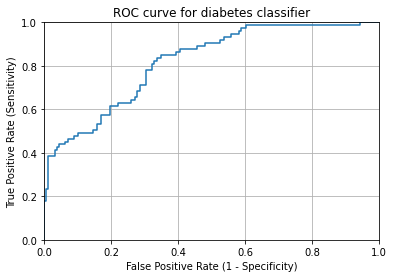

In [26]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [27]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [28]:
evaluate_threshold(0.5)

Sensitivity: 0.4931506849315068
Specificity: 0.8987341772151899


In [29]:
evaluate_threshold(0.3)

Sensitivity: 0.7123287671232876
Specificity: 0.6962025316455696


AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [30]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8174960984914167


- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

In [31]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.823920227920228

**Confusion matrix advantages:**

- Allows you to calculate a **variety of metrics**
- Useful for **multi-class problems** (more than two response classes)

**ROC/AUC advantages:**

- Does not require you to **set a classification threshold**
- Still useful when there is **high class imbalance**